In [34]:
import numpy as np
from numpy import asarray
import os
import subprocess
import json
import time
import PIL
from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
os.system("echo Hello from the other side!")
list_files = subprocess.run(["ls", "-l"])
print("The exit code was: %d" % list_files.returncode)

The exit code was: 0


In [9]:
subprocess.run(["curl", "-X", "GET", "https://api.scryfall.com/cards/named?fuzzy=forest"])

CompletedProcess(args=['curl', '-X', 'GET', 'https://api.scryfall.com/cards/named?fuzzy=forest'], returncode=0)

In [5]:
subprocess.run(["curl", "-o", "test.jpg", "https://c1.scryfall.com/file/scryfall-cards/art_crop/front/6/d/6da045f8-6278-4c84-9d39-025adf0789c1.jpg?1562404626"])

CompletedProcess(args=['curl', '-o', 'test.jpg', 'https://c1.scryfall.com/file/scryfall-cards/art_crop/front/6/d/6da045f8-6278-4c84-9d39-025adf0789c1.jpg?1562404626'], returncode=0)

In [4]:
with open('/home/skbarcus/Projects/MtG/Card_Arts/unique-artwork-20200901091942.json') as f:
  cards_data = json.loads(f.read())
  #cards_data = json.load(f)

In [5]:
print(type(cards_data))
print(len(cards_data))
print(len(cards_data[0]))
print(type(cards_data[0]))
#print(cards_data[0])
print(json.dumps(cards_data[0],indent=1))
print(cards_data[0]['image_uris'].get('art_crop'))


<class 'list'>
26795
58
<class 'dict'>
{
 "object": "card",
 "id": "0000579f-7b35-4ed3-b44c-db2a538066fe",
 "oracle_id": "44623693-51d6-49ad-8cd7-140505caf02f",
 "multiverse_ids": [
  109722
 ],
 "mtgo_id": 25527,
 "mtgo_foil_id": 25528,
 "tcgplayer_id": 14240,
 "name": "Fury Sliver",
 "lang": "en",
 "released_at": "2006-10-06",
 "uri": "https://api.scryfall.com/cards/0000579f-7b35-4ed3-b44c-db2a538066fe",
 "scryfall_uri": "https://scryfall.com/card/tsp/157/fury-sliver?utm_source=api",
 "layout": "normal",
 "highres_image": true,
 "image_uris": {
  "small": "https://c1.scryfall.com/file/scryfall-cards/small/front/0/0/0000579f-7b35-4ed3-b44c-db2a538066fe.jpg?1562894979",
  "normal": "https://c1.scryfall.com/file/scryfall-cards/normal/front/0/0/0000579f-7b35-4ed3-b44c-db2a538066fe.jpg?1562894979",
  "large": "https://c1.scryfall.com/file/scryfall-cards/large/front/0/0/0000579f-7b35-4ed3-b44c-db2a538066fe.jpg?1562894979",
  "png": "https://c1.scryfall.com/file/scryfall-cards/png/front/0/0

In [6]:
key = 'name'
target = 'Forest'
ntarget = 0
art_crop_url = ''
file_path = "/home/skbarcus/Projects/MtG/Card_Arts/Images/Forests/"

In [7]:
#Find all instances of the card 'Forest' and download the art crop for each.
start = time.time() #Start a timer.

for i in range(0,len(cards_data)):
    if cards_data[i].get(key) == target:
        art_crop_url = cards_data[i]['image_uris'].get('art_crop')
        #print(art_crop_url)
        ntarget = ntarget + 1
        subprocess.run(["curl", "-o", file_path+"%s_%d.jpg" % (target,ntarget), art_crop_url])
        time.sleep(0.1) #Don't make too many requests of the scryfall servers. (I think this is right?)

print('There are %d cards with key = %s and value = %s.' % (ntarget,key,target))
print("The script took %.2f seconds (%.2f minutes or %.2f hours) to run." % (time.time() - start, (time.time() - start)/60.,(time.time() - start)/60./60.)) #Print time to run.
    

There are 225 cards with key = name and value = Forest.
The script took 90.68 seconds (1.51 minutes or 0.03 hours) to run.


In [134]:
#Load an image.
image = Image.open(file_path+"Forest_1.jpg")
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)
# show the image
#image.show()https://bluejeans.com/861439920

xtot = 0
ytot = 0
xavg = 0
yavg = 0
ntot = 0
nlandscape = 0      
forests_arr = []     #Array to hold all the normalized image pixel data.
rex = 60             #Resized x coordinate.
rey = 45             #Resized y coordinate.
nrotations = 10    #Number of rotated images to produce per initial image.
rotate_range = 45    #Range to rotate the images randomly in. (degrees)

for entry in os.scandir(file_path):
    #print(entry.path)
    if entry.path.startswith(file_path+target):
        #print(entry.path)
        #print(image.size)
        image = Image.open(entry.path)
        if image.size[1]<image.size[0]:#Remove the landscape images since they may mess with the fitting.
            xtot = xtot + image.size[0]
            ytot = ytot + image.size[1]
            ntot = ntot + 1
            image_resize = image.resize((rex,rey), Image.ANTIALIAS) #resize chosen as average of portrait arts.
            #Normalize pixel values. Not all out of 255 max, but probably fine.
            #Could do fancier pixel normalization and centering later. (https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/)
            pixels = asarray(image_resize)
            pixels = pixels.astype('float32')
            #print('Data Type: %s' % pixels.dtype)
            #print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
            pixels /= 255.0
            #print('pixels 1 = ',pixels)
            forests_arr.append(pixels)
            #print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
            #print(type(image_resize))
            image_resize.save(file_path+"Resize_Forest_%d_%d_%d.jpg" % (rex,rey,ntot) , 'JPEG', quality=90) 
            #Note the original and resized numbers do not match.
            
            #Flip all images to increase data set size.
            #image_flip = np.fliplr(image_resize)
            image_flip = image_resize.transpose(PIL.Image.FLIP_LEFT_RIGHT)
            pixels_flip = asarray(image_flip)
            pixels_flip = pixels_flip.astype('float32')
            pixels_flip /= 255.0
            forests_arr.append(pixels_flip)
            #print('type(pixels_flip)',type(pixels_flip))
            #print('pixels.shape =',pixels.shape)
            image_flip.save(file_path+"Resize_Flip_Forest_%d_%d_%d.jpg" % (rex,rey,ntot) , 'JPEG', quality=90)
            
            #Create some randomly rotated images of the flipped images.
            # convert to numpy array
            data_flip = asarray(image_flip)
            # expand dimension to one sample
            pixels_flip_rotate = expand_dims(data_flip, 0)
            # create image data augmentation generator
            datagen_flip = ImageDataGenerator(rotation_range=rotate_range)
            # prepare iterator
            it_flip = datagen_flip.flow(pixels_flip_rotate, batch_size=1)
            # generate samples and plot
            for i in range(nrotations):
                # define subplot
                #plt.subplot(330 + 1 + i)
                # generate batch of images
                batch_flip = it_flip.next()
                # convert to unsigned integers for viewing
                image_flip_rotate = batch_flip[0].astype('uint8')
                image_flip_rotate = Image.fromarray(image_flip_rotate)
                #plot raw pixel data
                #plt.imshow(image_rotate)
                pixels_flip_rotate = asarray(image_flip_rotate)
                pixels_flip_rotate = pixels_flip_rotate.astype('float32')
                pixels_flip_rotate /=255
                #Append to the array of image pixel values.
                forests_arr.append(pixels_flip_rotate)
            #plt.imshow(pixels_flip_rotate)
            #plt.show()
            
            #Create some randomly rotated images.
            # convert to numpy array
            data = asarray(image_resize)
            # expand dimension to one sample
            pixels_rotate = expand_dims(data, 0)
            # create image data augmentation generator
            datagen = ImageDataGenerator(rotation_range=rotate_range)
            # prepare iterator
            it = datagen.flow(pixels_rotate, batch_size=1)
            # generate samples and plot
            for i in range(nrotations):
                # define subplot
                #plt.subplot(330 + 1 + i)
                # generate batch of images
                batch = it.next()
                # convert to unsigned integers for viewing
                image_rotate = batch[0].astype('uint8')
                image_rotate = Image.fromarray(image_rotate)
                #plot raw pixel data
                #plt.imshow(image_rotate)
                pixels_rotate = asarray(image_rotate)
                pixels_rotate = pixels_rotate.astype('float32')
                pixels_rotate /=255
                #Append to the array of image pixel values.
                forests_arr.append(pixels_rotate)
            #show the figure
            #plt.show()
            #plt.imshow(pixels_rotate)
            #plt.show()
        #if image.size[1]>image.size[0]:#Count number of landscape images.
        #    nlandscape = nlandscape + 1
        
xavg = xtot/ntot
yavg = ytot/ntot
print(ntot)
print(xavg,yavg)
print(nlandscape)
forests_arr = np.asarray(forests_arr)
print(type(forests_arr))
print(forests_arr.shape)

np.save(file_path + "forests_arr_flip_rotate_%d_%d" % (rex,rey), forests_arr)

JPEG
RGB
(626, 457)
213
609.1361502347418 455.99530516431923
0
<class 'numpy.ndarray'>
(4686, 45, 60, 3)


uint8
(456, 609, 3)


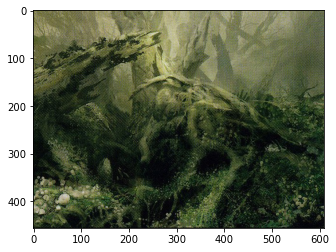

<class 'numpy.ndarray'>
(456, 609, 3)


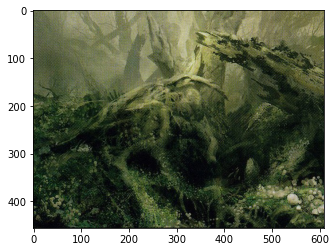

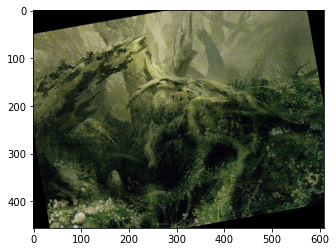

<class 'numpy.ndarray'> (456, 609, 3)
<class 'numpy.ndarray'> (1, 456, 609, 3)
[[[ 71.69268    73.83252    34.972355 ]
  [ 90.13167    91.76504    52.39841  ]
  [109.33977   110.53659    70.73341  ]
  ...
  [145.58148   148.52861    95.84578  ]
  [155.47797   157.52542   110.24068  ]
  [149.1822    149.47777   111.85223  ]]

 [[ 42.0032     45.9424      8.881601 ]
  [ 56.409275   59.47538    21.541485 ]
  [ 70.81535    73.00836    34.20137  ]
  ...
  [150.3835    152.89409   102.83054  ]
  [152.88728   154.1091    111.38909  ]
  [145.11229   144.82352   110.556145 ]]

 [[ 60.993465   66.732025   32.33987  ]
  [ 50.952866   55.818333   20.116533 ]
  [ 41.125874   45.118244    8.110617 ]
  ...
  [155.18553   157.25957   109.81531  ]
  [149.3949    149.74362   111.82564  ]
  [140.74681   140.02148   108.373405 ]]

 ...

 [[  4.375543    6.375543    0.7955533]
  [  0.          2.5019045   0.       ]
  [  1.6063422   5.811099    0.       ]
  ...
  [ 59.69793    83.69793    57.69793  ]
  [ 5

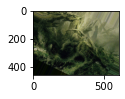

In [86]:
from matplotlib import image #For some weird reason only works once. I think it's fighting with the other definition of 'image' maybe?
# load image as pixel array
#image = ''
image = image.imread(file_path+"Resize_Forest_1.jpg")
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
plt.imshow(image)
plt.show()

print(type(image))
print(image.shape)
#print(image)
#print(forests_arr[0])

#Flip the image.
image_flip = np.fliplr(image)
plt.imshow(image_flip)
plt.show()

#Rotate an image.
image = Image.open(file_path+"Resize_Forest_1.jpg")
image_rotate = image.rotate(10, resample=0, expand=0, center=None, translate=None, fillcolor=None)
image_rotate = asarray(image_rotate)
plt.imshow(image_rotate)
plt.show()

# convert to numpy array
data = asarray(image)
#data = img_to_array(image)
print(type(data),data.shape)
# expand dimension to one sample
samples = expand_dims(data, 0)
print(type(samples),samples.shape)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=45)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(1):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    print(batch[0])
    print(type(batch[0]))
    #image_rotate1 = Image.fromarray(batch[0])
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    #image = batch[0]
    print(batch[0])
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()